# Calorie Burn Prediction

## The Model predict calorie based on duration of time you exercise ,gender ,body temprature etc

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import pandas as pd
Calorie = pd.read_csv("https://raw.githubusercontent.com/Chandrakant817/Calories-Burned-Prediction/main/Calories_Burned_Prediction/calories.csv")
Exercise = pd.read_csv("https://raw.githubusercontent.com/Chandrakant817/Calories-Burned-Prediction/main/Calories_Burned_Prediction/exercise.csv")

In [19]:
data = pd.concat([Exercise,Calorie['Calories']],axis = 1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [20]:
data.drop(['User_ID'],axis = 1,inplace = True)

In [25]:
data.replace({
    "male" : 0,
    "female" : 1
},inplace = True)

In [26]:
data.shape

(15000, 8)

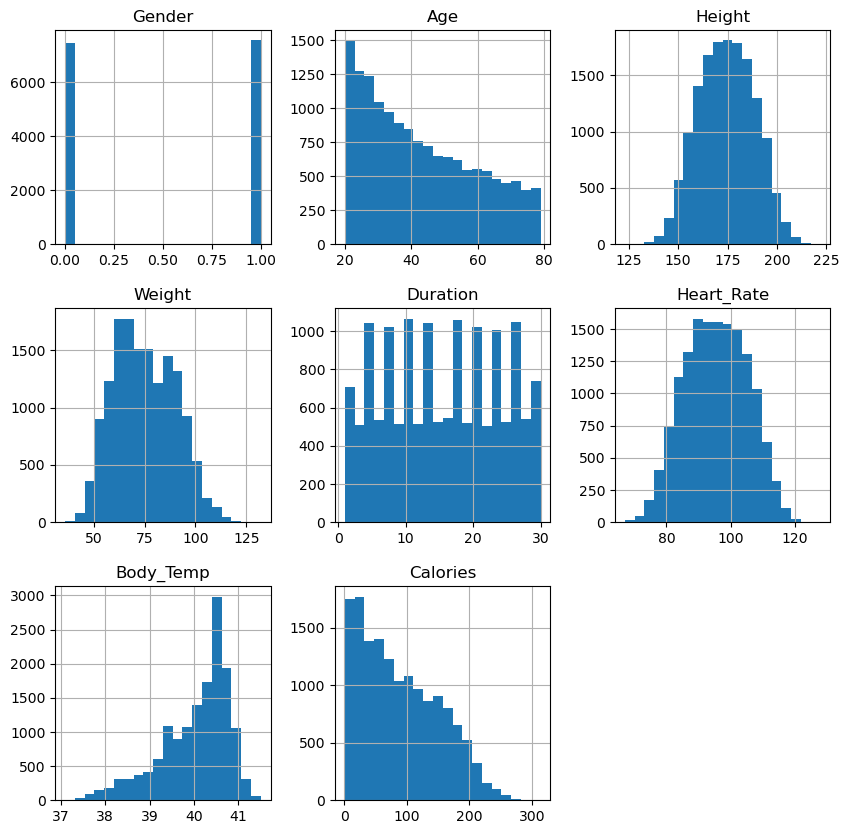

In [27]:
data.hist(bins = 20,figsize = (10,10))
plt.show()

In [29]:
data.corr()>0.7

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,True,False,False,False,False,False,False,False
Age,False,True,False,False,False,False,False,False
Height,False,False,True,True,False,False,False,False
Weight,False,False,True,True,False,False,False,False
Duration,False,False,False,False,True,True,True,True
Heart_Rate,False,False,False,False,True,True,True,True
Body_Temp,False,False,False,False,True,True,True,True
Calories,False,False,False,False,True,True,True,True


In [31]:
data.drop(['Height','Heart_Rate'],axis = 1,inplace = True)

In [33]:
X = data.drop(['Calories'],axis = 1)
Y = data.Calories

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size = 0.2,random_state = 23)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)
print("Train Accuracy : ",str(model_1.score(X_train,Y_train)))
print("Test Accuracy : ",str(model_1.score(X_test,Y_test)))

Train Accuracy :  0.9419473558319043
Test Accuracy :  0.9402700403098944


In [46]:
from sklearn.svm import SVR
model_2 = SVR(kernel = 'rbf',gamma = 0.5)
model_2.fit(X_train,Y_train)
print("Train Accuracy : ",str(model_2.score(X_train,Y_train)))
print("Test Accuracy : ",str(model_2.score(X_test,Y_test)))

Train Accuracy :  0.954770392361525
Test Accuracy :  0.9561565995008618


In [64]:
from xgboost import XGBRegressor
model_3 = XGBRegressor(max_depth = 3,gamma = 0.5,n_estimators = 50)
model_3.fit(X_train,Y_train)
print("Train Accuracy : ",str(model_3.score(X_train,Y_train)))
print("Test Accuracy : ",str(model_3.score(X_test,Y_test)))

Train Accuracy :  0.9666681785581474
Test Accuracy :  0.9634290176267527


In [69]:
y_pred = model_3.predict(X_test)
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(Y_test, y_pred)
mae

8.323045484706759